# COVID-19 INDIA Matplotlib Overview

In [1]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline

In [2]:
#hide
dft_cases = pd.read_csv('data/SnapshotCases-28-July.csv')
dft_deaths = pd.read_csv('data/SnapshotDeaths-28-July.csv')
states=dft_cases['states'].unique()
df = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')

In [3]:
#hide
list=df['Date'].unique()
recent_dates1=list[153:]
recent_dates = []
for date in recent_dates1:
    if int(date[5])==0 and int(date[6])==7:
        date2 = f'{date[8]}{date[9]}-Jul-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==8:
        date2 = f'{date[8]}{date[9]}-Aug-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==9:
        date2 = f'{date[8]}{date[9]}-Sep-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==0:
        date2 = f'{date[8]}{date[9]}-Oct-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==1:
        date2 = f'{date[8]}{date[9]}-Nov-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==2:
        date2 = f'{date[8]}{date[9]}-Dec-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==1:
        date2 = f'{date[8]}{date[9]}-Jan-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==2:
        date2 = f'{date[8]}{date[9]}-Feb-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==3:
        date2 = f'{date[8]}{date[9]}-Mar-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==4:
        date2 = f'{date[8]}{date[9]}-Apr-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==5:
        date2 = f'{date[8]}{date[9]}-May-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==6:
        date2 = f'{date[8]}{date[9]}-Jun-{date[2]}{date[3]}'
        recent_dates.append(date2)

In [4]:
#hide
df2=df.groupby('Date')

In [5]:
#hide
for i in range(len(recent_dates)):
    cs=np.array([],dtype='int')
    df3=df2.get_group(recent_dates1[i])
    
    #print(df3)
    dst=df3['State'].unique()
    #print(dst)
    df3=df3.set_index('State')
    for state in states:
        
        if state in dst:
            #x=np.array([1])
            x=df3.loc[state].Confirmed
        if state not in dst:
            x=np.array([0])
        cs=np.append(cs,x)
    dft_cases[recent_dates[i]]=cs    



In [6]:
#hide
for i in range(len(recent_dates)):
    cs=np.array([],dtype='int')
    df3=df2.get_group(recent_dates1[i])
    
    #print(df3)
    dst=df3['State'].unique()
    #print(dst)
    df3=df3.set_index('State')
    for state in states:
        
        if state in dst:
            #x=np.array([1])
            x=df3.loc[state].Deceased
        if state not in dst:
            x=np.array([0])
        cs=np.append(cs,x)
    dft_deaths[recent_dates[i]]=cs    


In [7]:
#hide

dft_cases.head()

,states,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,10-Oct-21,11-Oct-21,12-Oct-21,13-Oct-21,14-Oct-21,15-Oct-21,16-Oct-21,17-Oct-21,18-Oct-21,19-Oct-21
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,7633,7634,7635,7637,7640,7641,7641,7642,7642,7646
1,Andhra Pradesh,1,1,1,1,1,3,3,5,6,...,2057252,2057562,2058065,2058582,2059122,2059708,2060040,2060472,2060804,2061287
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,54900,54924,54942,54954,54958,54964,54980,54987,55014,55031
3,Assam,0,0,0,0,0,0,0,0,0,...,604969,605239,605465,605640,605847,605994,606263,606468,606766,607119
4,Bihar,0,0,0,0,0,0,0,0,2,...,725996,725998,726004,726008,726016,726021,726021,726026,726028,726033


In [8]:
#hide
dt_today = dft_cases.columns[-1]
dt_yday = dft_cases.columns[-2]

In [9]:
#hide

# Get the latest count of the total number of cases for each state across India, and also one from a day before

#Here past cases are a day earlier, but this can be changed
dfc_cases = dft_cases.groupby('states')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today].sum()
dfp_cases = dft_cases.groupby('states')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday].sum()

In [10]:
#hide
df_table= pd.DataFrame(dft_cases['states'])
df_table = df_table.set_index('states')

df_table['Cases'] = dfc_cases.values
df_table['Deaths'] = dfc_deaths.values
df_table['PCases'] = dfp_cases.values
df_table['PDeaths'] = dfp_deaths.values
df_table

,Cases,Deaths,PCases,PDeaths
states,,,,
Andaman and Nicobar Islands,7646,129,7642,129
Andhra Pradesh,2061287,14317,2060804,14313
Arunachal Pradesh,55031,280,55014,280
Assam,607119,5957,606766,5957
Bihar,726033,9661,726028,9661
Chandigarh,65310,820,65306,820
Daman and Diu,0,0,0,0
Delhi,1439441,25090,1439405,25089
Goa,177659,3354,177579,3350


In [11]:
#hide
df_table = df_table.sort_values(by=['Cases','Deaths'],ascending = [False,False])
df_table = df_table.reset_index()
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,Maharashtra,6594820,139865,6593182,139816
1,Kerala,4868640,27002,4860997,26925
2,Karnataka,2984022,37967,2983673,37953
3,Tamil Nadu,2689463,35928,2688284,35912
4,Andhra Pradesh,2061287,14317,2060804,14313


In [12]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [13]:
#hide
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,Maharashtra,6594820,139865,6593182,139816,1638,49,2.12
1,Kerala,4868640,27002,4860997,26925,7643,77,0.55
2,Karnataka,2984022,37967,2983673,37953,349,14,1.27
3,Tamil Nadu,2689463,35928,2688284,35912,1179,16,1.34
4,Andhra Pradesh,2061287,14317,2060804,14313,483,4,0.69


In [14]:
#hide
summary=dict()
summary['updated']=dft_cases.columns[-1]
summary['since']=dft_cases.columns[-2]
summary['Cases']=df_table['Cases'].values.sum()
summary['Deaths']=df_table['Deaths'].values.sum()
summary['PCases']=df_table['PCases'].values.sum()
summary['PDeaths']=df_table['PDeaths'].values.sum()
summary['Cases (+)']=df_table['Cases (+)'].values.sum()
summary['Deaths (+)']=df_table['Deaths (+)'].values.sum()
summary

{'updated': '19-Oct-21',
 'since': '18-Oct-21',
 'Cases': 31563845,
 'Deaths': 421306,
 'PCases': 31549549,
 'PDeaths': 421113,
 'Cases (+)': 14296,
 'Deaths (+)': 193}

In [15]:
#hide
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

In [16]:
#hide_input
# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

In [17]:
#hide
dt_cols = []
for i in range(len(dft_cases.columns)):
    dt_cols.append(dft_cases.columns[i])
dt_cols = dt_cols[1:]


In [18]:


#hide
#dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('states')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = dt_yday, ascending = False,inplace = True)

In [19]:
#hide
dft_ct_new_cases.head()

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,10-Oct-21,11-Oct-21,12-Oct-21,13-Oct-21,14-Oct-21,15-Oct-21,16-Oct-21,17-Oct-21,18-Oct-21,19-Oct-21
states,,,,,,,,,,,,,,,,,,,,,
Kerala,0,5,3,0,0,1,12,12,15,28,...,10691,6996,7823,11079,9246,8867,7955,7555,6676,7643
Maharashtra,0,18,6,3,3,4,4,12,10,23,...,2294,1736,2069,2219,2384,2149,1553,1715,1485,1638
Tamil Nadu,0,0,0,0,1,1,0,3,3,3,...,1329,1303,1289,1280,1259,1245,1233,1218,1192,1179
West Bengal,0,0,0,1,0,0,1,2,3,0,...,760,606,768,771,530,451,443,624,690,726
Andhra Pradesh,0,0,0,0,0,2,0,2,1,1,...,624,310,503,517,540,586,332,432,332,483


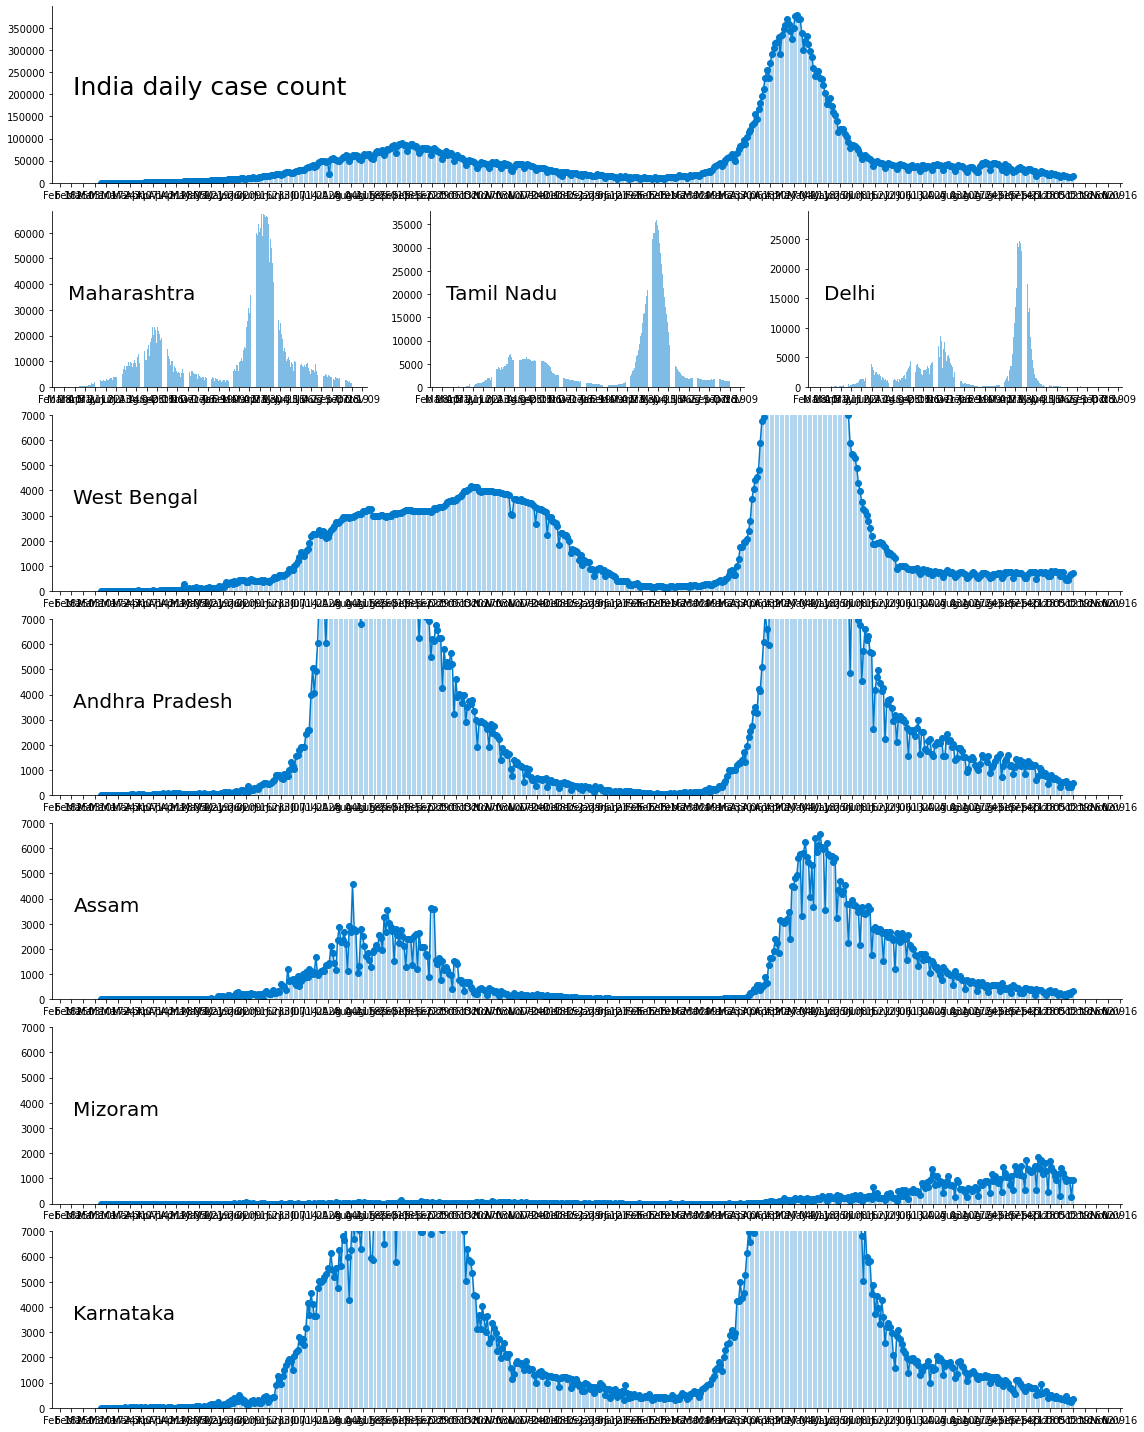

In [20]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()



In [21]:
#hide_input
print(df_table.to_string(index=False))

                      states    Cases  Deaths   PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
                 Maharashtra  6594820  139865  6593182   139816       1638          49           2.12
                      Kerala  4868640   27002  4860997    26925       7643          77           0.55
                   Karnataka  2984022   37967  2983673    37953        349          14           1.27
                  Tamil Nadu  2689463   35928  2688284    35912       1179          16           1.34
              Andhra Pradesh  2061287   14317  2060804    14313        483           4           0.69
               Uttar Pradesh  1710047   22898  1710028    22898         19           0           1.34
                 West Bengal  1581946   18998  1581220    18989        726           9           1.20
                       Delhi  1439441   25090  1439405    25089         36           1           1.74
                   Rajasthan   954392    8954   954392     8954          0        